## 조건부 확률 예제

In [1]:
from collections import Counter
import math, random

def random_kid():
    return random.choice(["boy", "girl"])

kid_test_list = [random_kid() for i in range(10)]
kid_test_list

['boy', 'girl', 'boy', 'girl', 'boy', 'boy', 'boy', 'girl', 'girl', 'girl']

In [6]:
both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(both | older):", both_girls/ older_girl)
print("P(both | either):", both_girls/ either_girl)

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


## 연속분포 (Continuous Distributions)

Populating the interactive namespace from numpy and matplotlib


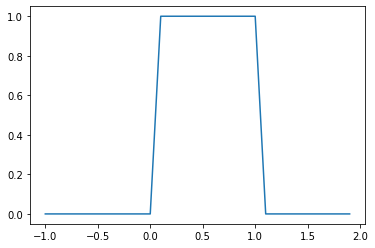

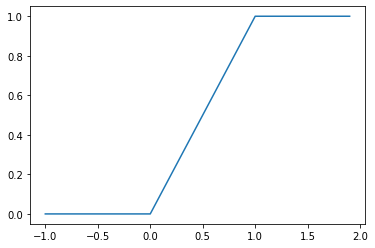

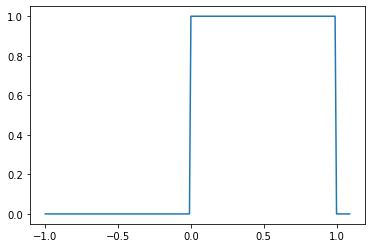

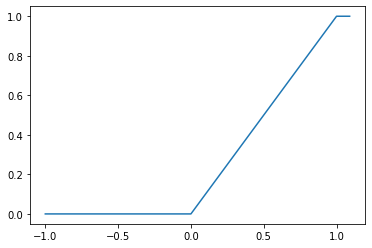

In [44]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    if x < 0:
        return 0
    elif x < 1:
        return x
    else: return 1

import numpy as np
import matplotlib.pyplot as plt
%pylab inline

x = np.arange(-1.0, 2.0, 0.1)
result_pdf_array = np.vectorize(uniform_pdf, otypes=[np.float])(x)
result_cdf_array = np.vectorize(uniform_cdf, otypes=[np.float])(x)
plt.plot(x, result_pdf_array)
plt.show()
plt.plot(x, result_cdf_array)
plt.show()

x = np.arange(-1.0, 1.1, 0.01)
result_pdf_array = np.vectorize(uniform_pdf, otypes=[np.float])(x)
result_cdf_array = np.vectorize(uniform_cdf, otypes=[np.float])(x)
plt.plot(x, result_pdf_array)
plt.show()
plt.plot(x, result_cdf_array)
plt.show()

## 정규분포

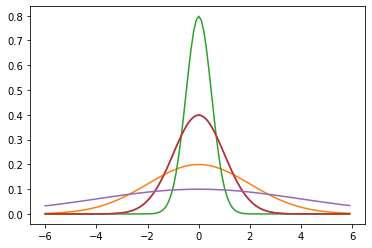

In [31]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu)**2 /2 / sigma **2)/ (sqrt_two_pi * sigma))

for sigma_value in [1,2,0.5,1,4]:
    x = np.arange(-6.0, 6.0, 0.1)
    result_array = np.vectorize(normal_pdf, otypes=[np.float])(x, sigma=sigma_value)
    plt.plot(x, result_array)
    
plt.show()

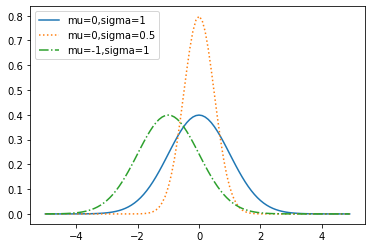

In [21]:
def plot_normal_pdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=2)
    plt.show()   

plot_normal_pdfs(plt)

## 정규분포의 누적분포함수


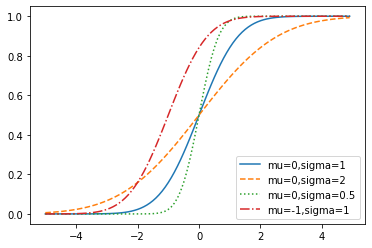

In [19]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) /2

def plot_normal_cdfs(plt):
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4)
    plt.show()

plot_normal_cdfs(plt)

## 정규 역누적 분포함수

In [41]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):

    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1                # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)   # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z


result_array = np.vectorize(inverse_normal_cdf, otypes=[np.float])([0, 0.5, 0.90, 0.95, 0.975, 1])
# 0%, 50%, 90%, 95%, 97.5%, 100%의 확률일경우 누적분포의 확률변수값
print(result_array)


[-8.75        0.          1.28155708  1.64484978  1.95996284  8.75      ]


## 중심 극한 정리

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


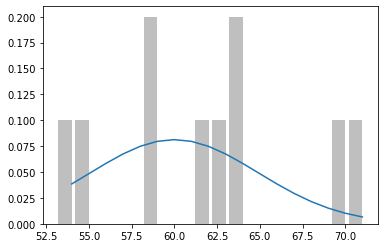

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


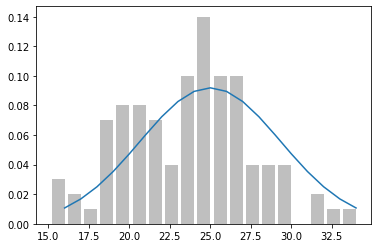

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


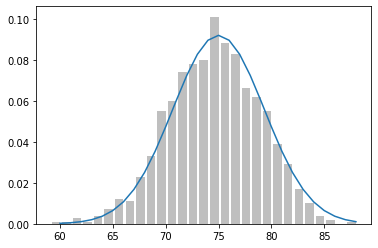

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


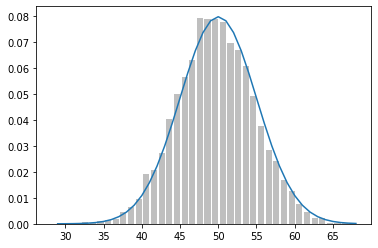

In [34]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    data = [binomial(p, n) for _ in range(num_points)]
    
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
          for i in xs]
    plt.plot(xs,ys)
    plt.show()
    
make_hist(0.6,100,10)
make_hist(0.25,100,100)
make_hist(0.75,100,1000)
make_hist(0.50,100,10000)


In [28]:
print("201601769 나요한")

201601769 나요한
